<a href="https://colab.research.google.com/github/leonistor/ml-manning/blob/master/04-machine-learning/TrainTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train / Test

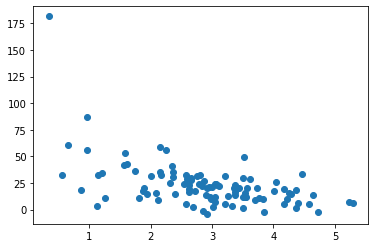

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# generate random data
np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50, 30.0, 100) / pageSpeeds

plt.scatter(pageSpeeds, purchaseAmount)

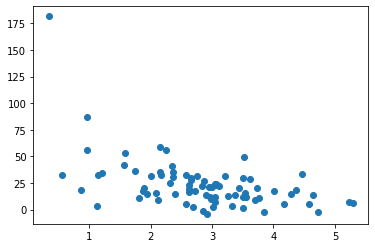

In [19]:
# split data: 80% training, 20% test
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]

plt.scatter(trainX, trainY)

In [0]:
# 8th degree polynomial will overfit for sure

x = np.array(trainX)
y = np.array(trainY)

poly = np.poly1d(np.polyfit(x, y, 7))

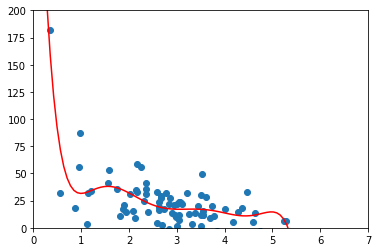

In [51]:
# plot on training data
xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, poly(xp), c='r')
plt.show()

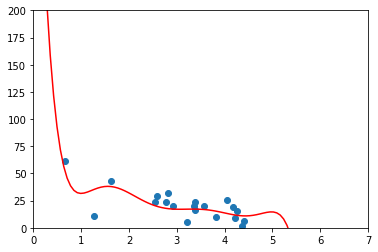

In [52]:
# plot on test data
testx = np.array(testX)
testy = np.array(testY)

axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(testx, testy)
plt.plot(xp, poly(xp), c='r')
plt.show()

In [53]:
# check r2 score for test
from sklearn.metrics import r2_score

# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
# A constant model that always predicts the expected value of y, disregarding the input features,
# would get a R^2 score of 0.0.

r2 = r2_score(testy, poly(testx))
print("test score: {:.2f}".format(r2))

test score: 0.55


In [54]:
# check r2 score for training

r2 = r2_score( np.array(trainY), poly(np.array(trainX)))
print("train score: {:.2f}".format(r2))

train score: 0.62


poly degree | test score | train score
--- | --- | ---
3 | 0.27 | 0.43
4 | 0.39 | 0.48
5 | 0.50 | 0.55
6 | 0.61 | 0.60
7 | 0.55 | 0.62
8 | 0.30 | 0.34
